In [ ]:
# Tarea5

**Envío del PR inicial:** lunes 17 de octubre

**Aceptación del PR:** lunes 31 de octubre

**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

Sabemos que los exponenetes de Lyapunov están dados por las fórmulas:

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

Usando que

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
\end{equation}

donde $x_i=f^i(x_0)$
obtenemos
\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
\end{equation}

Así que necesitamos algunas herramientas que ya hemos desarrollado anteriormente para atacar este problema. 
Escribiré a continuación algunas funciones que ya utilicé en notebooks anteriores para empezar a explorar los exponentes $\lambda(x_0)$ de la familia de mapeos cuadráticos $Q_C(x)$.

In [1]:

using Plots, PlotRecipes
pyplot()
using LaTeXStrings;
using TaylorSeries



    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [2]:
"""función que itera m veces un mapeo f(x) a patir de una condición inicial x_0
Devuelve los puntos x_n para toda n=1,2,...m en forma en un arreglo xvec"""
function iter_map(f::Function,x_0::Float64,m::Int)
    x=x_0
    xvec=Float64[]
    fvec=Float64[]
    push!(xvec,x)
    for i in 1:m
        x=f(x)
        push!(xvec,x)
    end 
    return xvec
end 
        

iter_map (generic function with 1 method)

In [3]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) n: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(f,crange,n,x0,Nlast)
diagBif=Float64[]
cs=Float64[]
    for c in crange
        Q(x)=f(x,c)
        x=iter_map(Q,x0,n)
        for i in 0:Nlast
            push!(cs,c)
            bif=x[end-i]
            push!(diagBif,bif)
        end
    end
        return cs,diagBif   
end 

Bif_diag (generic function with 1 method)

In [4]:
"""Función que evalua el coeficiente de lyapunov de un mapeo f(x,c) a partir de una condición 
inicial x0, con n iterados. Observación: para que de una buena aproximación n tiene que ser 
grande.
En sus argumentos se debe incluir la función f y su derivada f'"""
function lyapunov(f,f´,x0,n)
    x=x0
    lyap=0
    for i in 1:n
        x=f(x)
        fpr=f´(x)
        aux=log(abs(fpr))
        lyap=lyap+aux
    end 
    lyap=(1/n)*lyap
    return lyap
end 
    

lyapunov (generic function with 1 method)

Dibujemos el diagrama de bifurcaciones para la familia de mapeos cuadráticos, iterando la condición inicial $x_0=0$:

In [5]:
ces=-2:1/2^10:0.25

-2.0:0.0009765625:0.25

In [6]:
Qc(x,c)=x^2+c
Qc´(x)=2x

Qc´ (generic function with 1 method)

In [7]:
x0=0.01
n=10000
Nlast=500;

In [8]:
cs,diagBif=Bif_diag(Qc,ces,n,x0,Nlast);


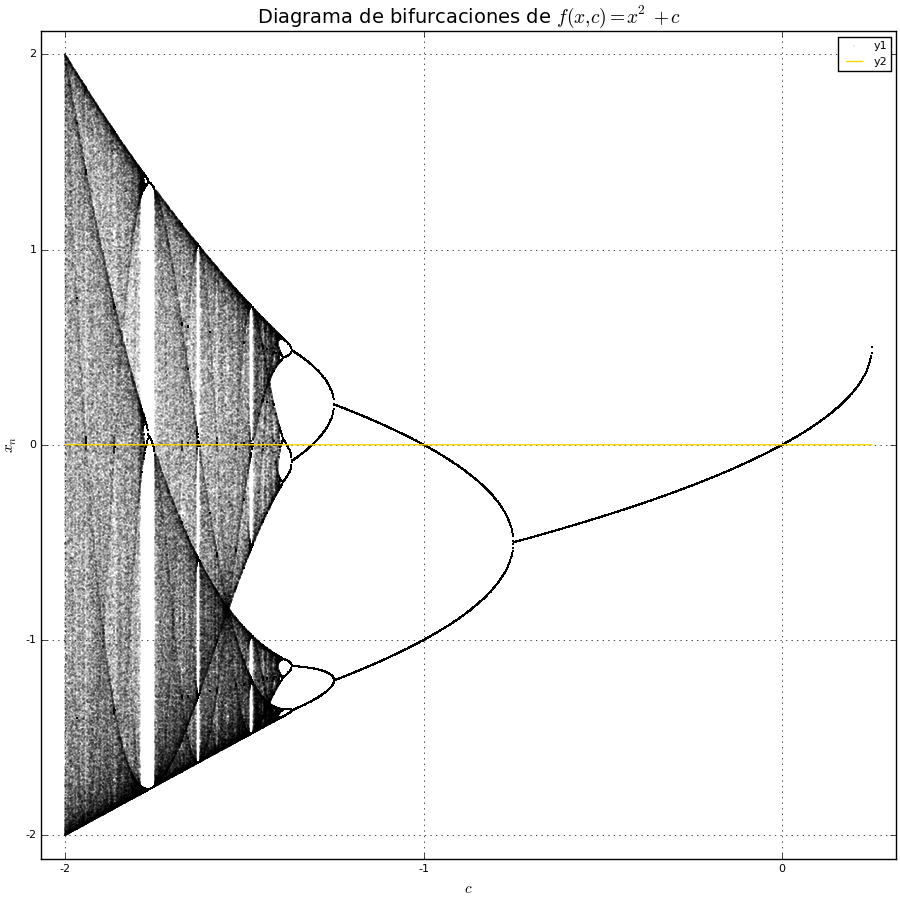

In [23]:
scatter(cs,diagBif, markersize=0.05, xaxis=(L"c"), 
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$"),size=(900,900))
plot!(ces,zeros(length(ces)),c=:gold)
xlabel!(L"c")
ylabel!(L"x_n")



In [14]:
"""esta función calcula la longitud de la orbita de la iteración de f(x,c) a partir de una 
condición inicial x0 y un parámetro c. La función itera n veces la condicion inicial y 
a partir de ahí ve los valores distintos de las x_{n+i} para determinar la longitud de la 
orbita.
"""
function orbit_length(f,x0,c,n)
    G(x)=f(x,c)
    x=x0
    tol=1e-8
    cont=1
    for i in 1:n
        x=G(x)
    end 
    xf=x
    xorbit=G(xf)
    while abs(xf-xorbit)>tol
        cont=cont+1
        xorbit=G(xorbit)   
        if cont>1025
            println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 
      

orbit_length (generic function with 1 method)

In [54]:
"""Función que calcula los parámetros de Feigenbaum con los puntos superestables dados 
en un arreglo cs"""
function fn_ratio(cn)
    fn=Float64[]
    for i in 1:length(cn)-2
        ratio=(cn[i]-cn[i+1])/(cn[i+1]-cn[i+2])
        push!(fn,ratio)
    end 
    return fn
end


fn_ratio (generic function with 1 method)

Iteramos todos los parámetros $c$ del rango dado en 'ces=-2:1/2^10:0.25', para poder graficar los valores calculados de los exponentes de Lyapunov en el intervalo $c\in(-2,0.25)$

In [20]:
lyaps=Float64[]
for c in ces
    f(x)=Qc(x,c)
    L=lyapunov(f,Qc´,0.01,10000)
    push!(lyaps,L)
end 


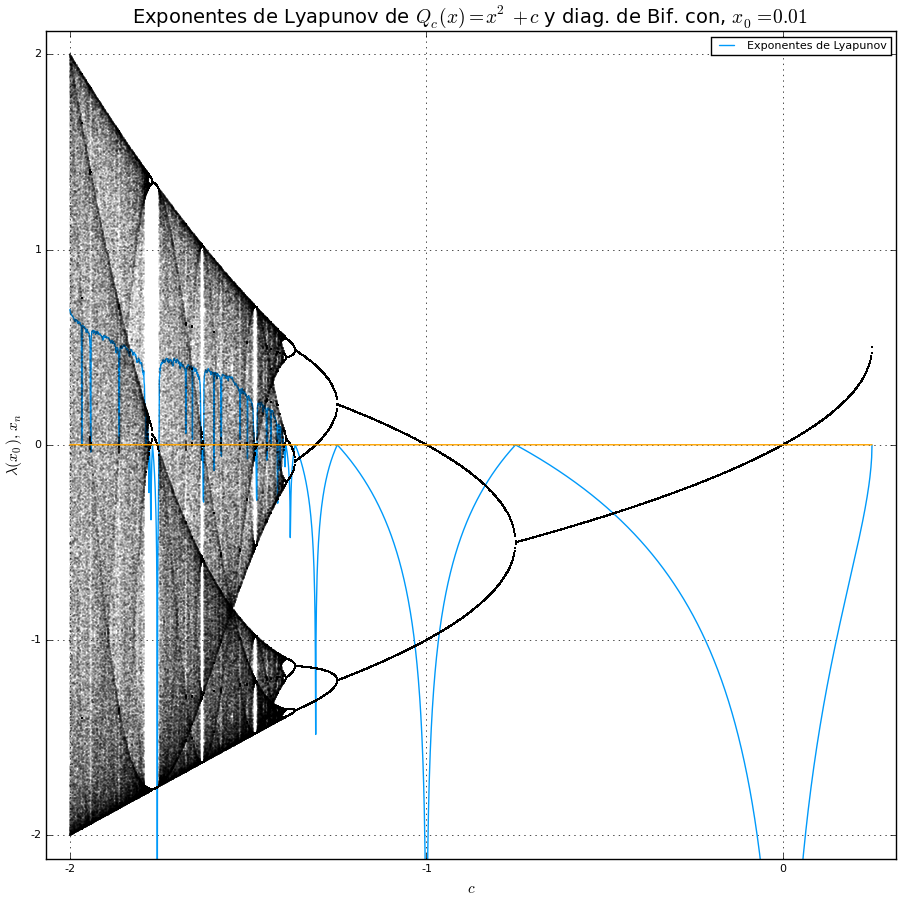

In [40]:
plot(ces,lyaps,label="Lyapunov's")
scatter!(cs,diagBif, markersize=0.05,size=(900,900),label="")
title!(L"Exponentes de Lyapunov de $Q_c(x)=x^2+c$ y diag. de Bif. con, $x_0=0.01$ ",ylim=(-2,2))
xlabel!(L"c")
ylabel!(L"\lambda(x_0), \ x_n")
plot!(ces,zeros(length(ces)),c=:orange,label="")

Haciendo un zoom:


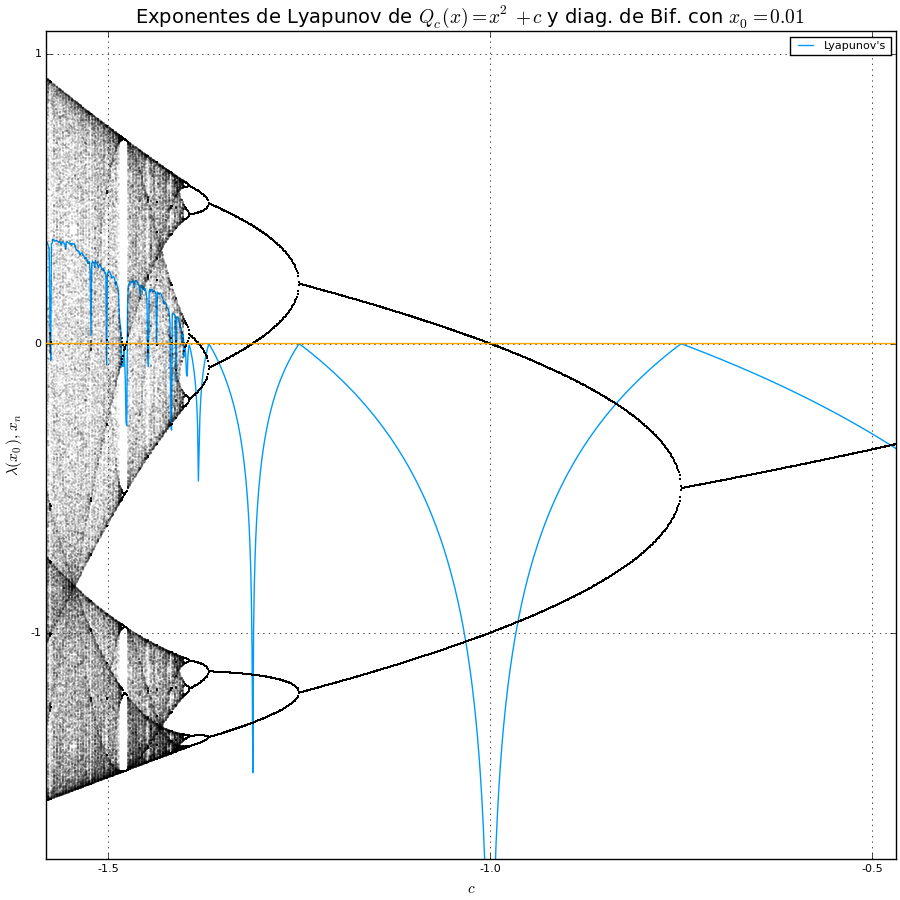

In [41]:
plot(ces,lyaps,xlim=(-1.55,-0.5),ylim=(-1.7,1),label="Lyapunov's")
scatter!(cs,diagBif, markersize=0.05,size=(900,900),label="")
title!(L"Exponentes de Lyapunov de $Q_c(x)=x^2+c$ y diag. de Bif. con $x_0=0.01$ ")
xlabel!(L"c")
ylabel!(L"\lambda(x_0), \ x_n")
plot!(ces,zeros(length(ces)),c=:orange,label="")

Si observamos la recta $f(c)=0$ notamos que **en los puntos en donde ocurren las bifurcaciones, los valores de los exponentes de Lyapunov son cero**. (Esto contesta la primera pregunta).

Recordemos también que se dice que **existe caos** cuando los exponentes de Lyapunov son positivos mientras que **no existe caos** cuando los exponentes de Lyapunov son negativos.
Con este reocrdatorio, notemos  también que **existe un valor de *c* ** que divide los mapeos para los cuales emipieza a existir caos. Es dceir que $\exists \ c_{ch}$ tal que para $c\geq c_{ch}$ los mapeos $Q_c(x)$ no presentan caos, mientras que para $c\leq c_{ch}$ puede exstir caos.

Haciendo de nuevo un zoom se puede decir que el valor de $c_{ch}$ está cercano a  $-1.4$.


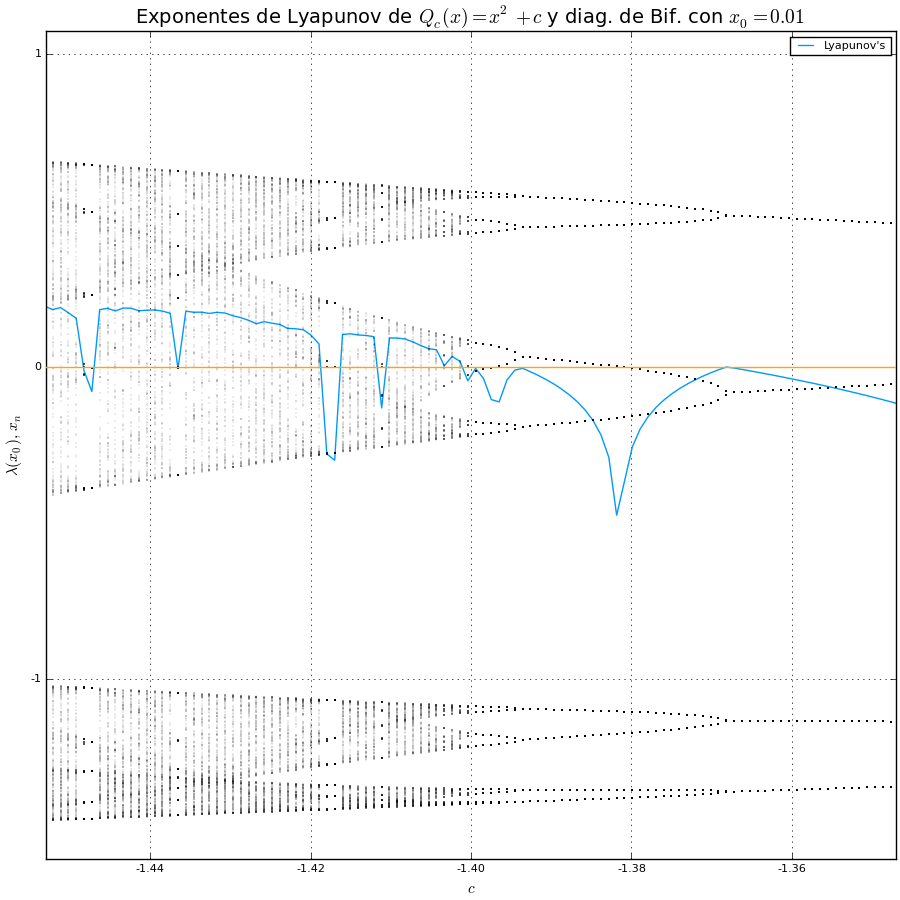

In [42]:
plot(ces,lyaps,xlim=(-1.45,-1.35),ylim=(-1.5,1),label="Lyapunov's")
scatter!(cs,diagBif, markersize=0.05,size=(900,900),label="")
title!(L"Exponentes de Lyapunov de $Q_c(x)=x^2+c$ y diag. de Bif. con $x_0=0.01$ ")
xlabel!(L"c")
ylabel!(L"\lambda(x_0), \ x_n")
plot!(ces,zeros(length(ces)),c=:orange,label="")

Para contestar a la segunda pregunta, notemos que si $x=0$ es parte de una órbita periódica entonces $Q´_c(x=0)=2(0)=0$. Por lo tanto el producto 

\begin{equation}
\prod_{i=1}^{n} f'(x_i)=0
\end{equation}

y por tanto 
\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \prod_{i=1}^{n} f'(x_i)\Big| \rightarrow -\infty,
\end{equation}

Este comportamiento se observa en los "picos" del diagrama de los exponentes de Lyapunov que mostré anteriormente.

Por lo tanto, **en ciclos superestables**, los exponentes de Lyapunov tienden a $-\infty$ para la familia de mapeos cuadráticos $Q_c(x)=x^2+c$.

**Ejercicio 2:**

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.)

Si queremos que $x_0=0$ sea parte de la órbita de periodo $n$, se debe satisfacer que dicho punto sea un punto fijo del mapeo $Q^n_c(x)$. 
Por lo tanto encontrar los puntos superestables se traduce a encontrar las soluciones de

$$Q^n_c(x=0)=0$$

Por ejemplo para n=1, se tiene que 
$$Q_c(x=0)=0 \iff c=0$$

para n=2, se tiene que 

$$Q_c^2(x=0)=(0+c)^2+c=0 \iff c^2+c=0 \iff c(c+1)=0 $$


Por tanto el segundo ciclo super estable se tiene cuando $$ c=-1$$.

Así sucesivamente para toda $n$.

Usemos las funciones definidas por Luis en el [notebook 9](https://github.com/lbenet/2017-1_TSFisComp/blob/master/notas_clase/09_Mapeos1d-4.ipynb) de notas de clase, para calcular las raíces de $Q_c^n$.

Usemos las funciones definidas por Luis en el notebook 9 de notas de clase, para calcular las raíces de $Q_c^n$.

In [43]:
"""
    Qcⁿ(x, c,n)

Esta función define el n-enésimo iterado de Qc(x,c),
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""
function Qcⁿ(x,c,n)
    #c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ (generic function with 1 method)

In [49]:
"""método de Taylor para encontrar las raíces de una función f(x) a partir de una estimación
inicial x0"""
function roots_newton(f, x0)
    t = Taylor1(1)
    for ind = 1:100
       fT = f(x0+t)
       x0 = x0 - fT.coeffs[1]/fT.coeffs[2]
    end
    x0
end

roots_newton (generic function with 1 method)

La siguiente función calcula toads las posibles raíces reales de los mapeos $Q_c^i$ con $i=1,...2n$ y los devuelve en un  arreglo 'Cn'. Este arreglo corresponde entonces a los parámetros $c$ para los caules se tienen ciclos superestables.

In [46]:
"""funcion que quita los valores repetidos en un arreglo de entrada """
function clean(arr)
    bifsclean=Float64[]
    tol=1e-10
    eq=arr[1]
    push!(bifsclean,eq)
    for i in 1:length(arr)-1
        if abs(arr[i+1]-arr[i])<tol
            nothing
        else 
            eq=arr[i+1]
            push!(bifsclean,eq)
        end
    end 
    return bifsclean
end 

clean (generic function with 1 method)

In [47]:
"""Función que encuentra los parametros Cn que corresponden a ciclos super estables
Los parámetros de entrada son 
n=numero de parámetros que se desean encontrar"""
function superstable_Qcmap(n)
    Cn=Float64[]
    crange=0.1:-0.001:-1.401 #rango de estimaciones iniciales para el método de newton
    for i in 1:n
        Qn(c)=Qcⁿ(0,c,2*i)
        for x0 in crange
            Sspoint=roots_newton(Qn,x0)
             #EL último punto de bifurcacion que se calcul
            if Sspoint>-1.401 && Sspoint<=0 #stopping rule
            push!(Cn,Sspoint)
            else 
                nothing
            end 
        end 
    end 
    a=sort(Cn)
    Cn=clean(a)
    return Cn
end 
        
    

superstable_Qcmap (generic function with 1 method)

In [50]:
Cn=superstable_Qcmap(32);


In [51]:
reord=zeros(length(Cn))
[ reord[i+1]=Cn[end-i] for i in 0:length(Cn)-1]
[println(reord[i]) for i in 1:length(Cn)];

0.0
-1.0
-1.310702641336833
-1.3815474844320617
-1.396945359704561
-1.400253081214783
-1.4009619629448422


**Este último arreglo corresponde a los parámetros $C_n$ en donde se tienen órbitas super estables**

Calculemos el parámetro

$$a_n = \frac{d_n}{d_{n+1}}$$

En donde $d_n$ se define como la mínima distancia del punto de la órbita generada a partir de la iteración del mapeo 

$$Q_{C_n}(x)=x^2+C_n$$

con $C_n$ los parámetros que dan las órbitas super estables.
Para encontrar $d_n$ iteramos $Norb=10,000$ el mapeo $Q_{C_n}$ y a partir de ahi guardamos los valores de los iterados $x_m$ con $m\geq Norb$ y tomamos el mínimo de  tales $|x_m|$ 

In [52]:
"""función que determina las distancias d_n del mapeo cuadrático a partir de 
la condición inicial x0=0 utilizando los parámetros de super estabilidad del arreglo Cn"""
function dn(Norb,Cn)
       dn1=Float64[0]
    di=1
    for i in 2:length(reord)
        f(x)=Qc(x,reord[i])
        x0=0.
        m=15000
        xx=iter_map(f, x0, m)
        dist=Float64[]
        for i in 0:63
            push!(dist,xx[end-i])
        end 
    a=abs(dist)
    a=clean(sort(a))
    di=a[2]
    push!(dn1,di)
    end
    return dn1
end 
            

dn (generic function with 1 method)

In [53]:
d_n=dn(15000,reord)

7-element Array{Float64,1}:
 0.0      
 1.0      
 0.407239 
 0.163425 
 0.0653634
 0.0261213
 0.0104369

Con estas distancias mínimas, calculemos la segunda constante de Feigenbaum

In [55]:
α=1
for i in 1:length(d_n)-1
    α=d_n[i]/d_n[i+1]
    println(α)
end 

0.0
2.455561864707475
2.4918945698987063
2.500259001953708
2.5023054105262728
2.5027742269111797


Vemos que $\alpha$ tiende al valor 

$$\alpha =2.502 774 226 911 179 $$

Comparándolo con el valor de [Wikipedia](https://en.wikipedia.org/wiki/Feigenbaum_constants#The_second_constant) dado por

$$\alpha_{wiki} = 2.502 907 875 095$$

podemos decir que los métodos implementados funcionan bien para encontrar la segunda constante de Feigenbaum.

**Ejercicio 3:**

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


**Ejercicio 4:**

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

In [364]:
Q4(x)=Qc(x,-2.2)

Q4 (generic function with 1 method)

In [366]:
iter_map(Q4,0.01,10)

11-element Array{Float64,1}:
   0.01      
  -2.1999    
   2.63956   
   4.76728   
  20.5269    
 419.155     
   1.75689e5 
   3.08665e10
   9.5274e20 
   9.07714e41
   8.23944e83

**Ejercicio 5:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Liapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, ayuden al método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)